# Neuro n_genes with small (u,s) for each cell

In [1]:
%load_ext autoreload
%load_ext autotime

import os
import glob
import random
import sys
import math
# import from absolute directory
srcdir = '/Users/pengzhizhang/cellDancer/src'
sys.path.append(srcdir)

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm 

time: 789 ms (started: 2022-05-16 18:22:55 -05:00)


In [2]:
import celldancer.cdplt as cdplt
from celldancer.cdplt import colormap

time: 2.77 s (started: 2022-05-16 18:22:56 -05:00)


In [3]:
detail_result_path = '/Users/pengzhizhang/pseudotime/data/neuro/velocity_result'
output_path = os.getcwd()
detail_file = os.path.join(detail_result_path,'combined_detail.csv')
load_cellDancer=pd.read_csv(detail_file)

time: 1min 12s (started: 2022-05-16 18:22:59 -05:00)


In [119]:
df = load_cellDancer[['cellIndex','gene_name', 's0', 'u0']]

data = df[['s0','u0']].to_numpy()

cells = df['cellIndex'].drop_duplicates()
n_cells = len(cells)

gene_names = load_cellDancer.gene_name.drop_duplicates()
n_genes = len(gene_names)

norm_data = []

# normalize the gene expression in all cells.
for gene in tqdm.tqdm(range(n_genes),total=n_genes):
    _u_s = data[n_cells*gene:n_cells*gene+n_cells]
    _u_s = _u_s/np.max(_u_s, axis=0)
    norm_data.append(_u_s)
    
norm_data = np.array(norm_data)

100%|█| 2148/2148 [00:00<00:00, 98


time: 2.9 s (started: 2022-05-13 16:01:00 -05:00)


100%|█| 18140/18140 [0
100%|█| 18140/18140 [0
100%|█| 18140/18140 [0
100%|█| 18140/18140 [0


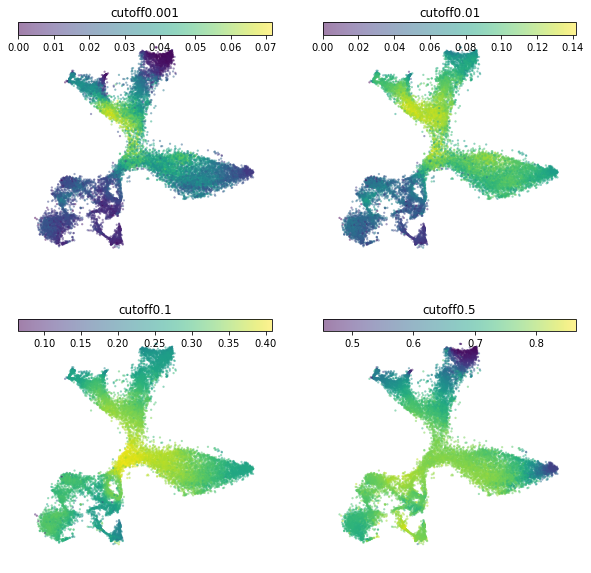

time: 1min 5s (started: 2022-05-13 16:33:20 -05:00)


In [135]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), sharex=True, sharey=True)
idx = 0
nrows = 2
ncols = 2
for tiny in (0.001, 0.01, 0.1, 0.5):
    row, col = np.floor(idx/ncols).astype(int), idx%ncols
    num_lowExp_genes = np.zeros(len(cells))

    # in a cell, grab expression of all genes
    for cell in tqdm.tqdm(cells, total=len(cells)):
        _u_s = norm_data[:,cell,:]
        num_lowExp_genes[cell] += len(_u_s[np.all(_u_s<tiny, axis=-1)])/n_genes    

    load_cellDancer['n_lowEx_gene'] = np.tile(num_lowExp_genes, n_genes)


    xlim = (-25, 30)
    ylim = (-25, 30)

    gene = 'Dcx'
    im=cdplt.cell.scatter_cell(axes[row, col],load_cellDancer, 
                               colors='n_lowEx_gene',
                               gene_name=gene, velocity=False, 
                               custom_xlim=xlim, custom_ylim=ylim, 
                               #vmin=0, vmax=1,
                               colorbar='on')

    axes[row,col].axis('off')
    axes[row,col].set_title('cutoff'+str(tiny))
    idx += 1
plt.show()

In [129]:
load_cellDancer

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,cellID,clusters,embedding1,embedding2,n_lowEx_gene
0,0,0610007P14Rik,1.232261,0.072207,1.259473,0.074903,0.064000,0.811681,0.003397,0.060301,10X83_2:AAACGGGGTCTCTTTAx,ImmGranule2,18.931086,-1.862429,1469.0
1,1,0610007P14Rik,1.133782,0.078814,1.163397,0.078786,0.063456,0.805846,0.003776,0.060301,10X83_2:AACCATGGTTCAACCAx,ImmGranule2,18.419891,-1.282895,1494.0
2,2,0610007P14Rik,1.514005,0.135724,1.567264,0.119788,0.078587,0.813846,0.002602,0.060301,10X83_2:AACACGTTCTGAAAGAx,CA2-3-4,2.369887,16.868419,1304.0
3,3,0610007P14Rik,0.694710,0.067970,0.719411,0.068489,0.054528,0.786969,0.005885,0.060301,10X83_2:AAAGATGCATTGAGCTx,CA,-5.351040,10.676485,1616.0
4,4,0610007P14Rik,0.892577,0.113096,0.934898,0.100961,0.064767,0.787270,0.004924,0.060301,10X83_2:AACCATGTCTACTTACx,CA1-Sub,-6.189126,11.754900,1589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38964715,18135,Zwint,0.628872,0.102383,0.661537,0.112521,0.107899,0.855837,0.035450,0.062125,10X84_3:TTTCCTCCACCATCCTx,ImmGranule1,10.812611,-2.487668,1643.0
38964716,18136,Zwint,2.242793,0.237419,2.335716,0.236443,0.224360,0.953217,0.018043,0.062125,10X84_3:TTTGTCACATGAAGTAx,CA2-3-4,8.246204,23.482788,997.0
38964717,18137,Zwint,0.279290,0.154337,0.335284,0.164991,0.144815,0.800248,0.041252,0.062125,10X84_3:TTTCCTCCACGGTAAGx,nIPC,-3.441272,-4.917364,1701.0
38964718,18138,Zwint,0.697305,0.128248,0.740287,0.132708,0.119159,0.859578,0.034811,0.062125,10X84_3:TTTGTCAAGCGTCAAGx,ImmGranule2,16.394199,-6.143549,1613.0


time: 18.9 ms (started: 2022-05-13 16:15:08 -05:00)


In [130]:
tiny = 0.1
num_lowExp_genes = np.zeros(len(cells))

# in a cell, grab expression of all genes
for cell in tqdm.tqdm(cells, total=len(cells)):
    _u_s = norm_data[:,cell,:]
    num_lowExp_genes[cell] += len(_u_s[np.all(_u_s<tiny, axis=-1)])    

load_cellDancer['n_lowEx_gene'] = np.tile(num_lowExp_genes, n_genes)


100%|█| 18140/18140 [0


time: 5.96 s (started: 2022-05-13 16:16:32 -05:00)


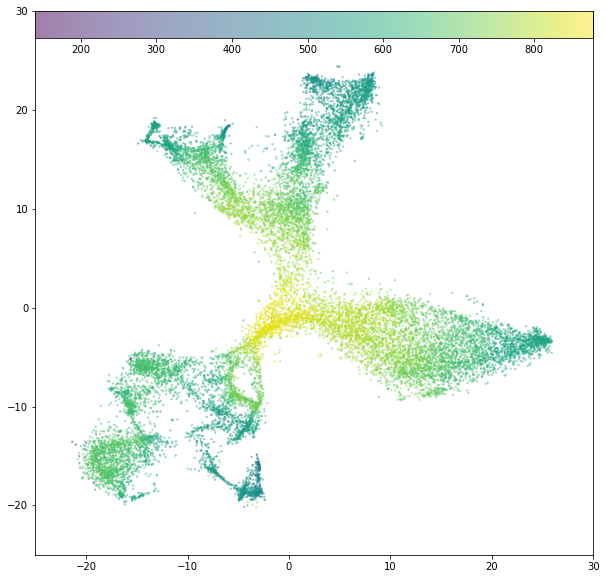

time: 12.9 s (started: 2022-05-13 16:18:37 -05:00)


In [132]:
    fig, ax = plt.subplots(figsize=(10,10))
    xlim = (-25, 30)
    ylim = (-25, 30)

    gene = 'Dcx'
    im=cdplt.cell.scatter_cell(ax,load_cellDancer, 
                               colors='n_lowEx_gene',
                               gene_name=gene, velocity=False, 
                               custom_xlim=xlim, custom_ylim=ylim, 
                               colorbar='on')

    #axes[row,col].axis('off')
    #axes[row,col].set_title('cutoff'+str(tiny))

In [10]:
df = load_cellDancer[['cellIndex','gene_name', 's0', 'u0']]

data = df[['s0','u0']].to_numpy()

cells = df['cellIndex'].drop_duplicates()
n_cells = len(cells)

gene_names = load_cellDancer.gene_name.drop_duplicates()
n_genes = len(gene_names)

norm_data = []
max_us = np.max(data, axis=0)
# normalize the gene expression in all cells.
for gene in tqdm.tqdm(range(n_genes),total=n_genes):
    _u_s = data[n_cells*gene:n_cells*gene+n_cells]
    _u_s = _u_s/max_us
    norm_data.append(_u_s)
    
norm_data = np.array(norm_data)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2148/2148 [00:00<00:00, 7427.71it/s]


time: 2.97 s (started: 2022-05-16 18:32:40 -05:00)


In [15]:
norm_data.shape

(2148, 18140, 2)

time: 2.28 ms (started: 2022-05-16 18:40:14 -05:00)


In [13]:
load_cellDancer.n_lowEx_gene

,cellIndex,gene_name,s0,u0,s1,u1,alpha,beta,gamma,cost,cellID,clusters,embedding1,embedding2,n_lowEx_gene
0,0,0610007P14Rik,1.232261,0.072207,1.259473,0.074903,0.064000,0.811681,0.003397,0.060301,10X83_2:AAACGGGGTCTCTTTAx,ImmGranule2,18.931086,-1.862429,0.999534
1,1,0610007P14Rik,1.133782,0.078814,1.163397,0.078786,0.063456,0.805846,0.003776,0.060301,10X83_2:AACCATGGTTCAACCAx,ImmGranule2,18.419891,-1.282895,0.999534
2,2,0610007P14Rik,1.514005,0.135724,1.567264,0.119788,0.078587,0.813846,0.002602,0.060301,10X83_2:AACACGTTCTGAAAGAx,CA2-3-4,2.369887,16.868419,1.000000
3,3,0610007P14Rik,0.694710,0.067970,0.719411,0.068489,0.054528,0.786969,0.005885,0.060301,10X83_2:AAAGATGCATTGAGCTx,CA,-5.351040,10.676485,0.999534
4,4,0610007P14Rik,0.892577,0.113096,0.934898,0.100961,0.064767,0.787270,0.004924,0.060301,10X83_2:AACCATGTCTACTTACx,CA1-Sub,-6.189126,11.754900,0.999534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38964715,18135,Zwint,0.628872,0.102383,0.661537,0.112521,0.107899,0.855837,0.035450,0.062125,10X84_3:TTTCCTCCACCATCCTx,ImmGranule1,10.812611,-2.487668,1.000000
38964716,18136,Zwint,2.242793,0.237419,2.335716,0.236443,0.224360,0.953217,0.018043,0.062125,10X84_3:TTTGTCACATGAAGTAx,CA2-3-4,8.246204,23.482788,0.999534
38964717,18137,Zwint,0.279290,0.154337,0.335284,0.164991,0.144815,0.800248,0.041252,0.062125,10X84_3:TTTCCTCCACGGTAAGx,nIPC,-3.441272,-4.917364,1.000000
38964718,18138,Zwint,0.697305,0.128248,0.740287,0.132708,0.119159,0.859578,0.034811,0.062125,10X84_3:TTTGTCAAGCGTCAAGx,ImmGranule2,16.394199,-6.143549,0.999534


time: 24.1 ms (started: 2022-05-16 18:37:34 -05:00)


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18140/18140 [00:02<00:00, 8888.75it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18140/18140 [00:02<00:00, 7437.74it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18140/18140 [00:02<00:00, 7630.21it/s]


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 18140/18140 [00:02<00:00, 8022.47it/s]


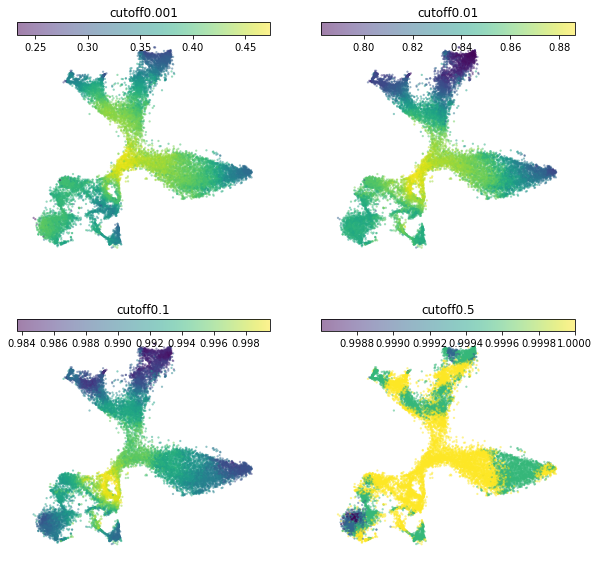

time: 53.4 s (started: 2022-05-16 19:00:46 -05:00)


In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10), sharex=True, sharey=True)
idx = 0
nrows = 2
ncols = 2
for tiny in (0.001, 0.01, 0.1, 0.5):
    row, col = np.floor(idx/ncols).astype(int), idx%ncols
    num_lowExp_genes = np.zeros(len(cells))

    # in a cell, grab expression of all genes
    for cell in tqdm.tqdm(cells, total=len(cells)):
        _u_s = norm_data[:,cell,:]
        #print(_u_s.mean())
        num_lowExp_genes[cell] += len(_u_s[np.all(_u_s<tiny, axis=-1)])/n_genes    

    load_cellDancer['n_lowEx_gene'] = np.tile(num_lowExp_genes, n_genes)


    xlim = (-25, 30)
    ylim = (-25, 30)

    gene = 'Dcx'
    im=cdplt.cell.scatter_cell(axes[row, col],load_cellDancer, 
                               colors='n_lowEx_gene',
                               gene_name=gene, velocity=False, 
                               custom_xlim=xlim, custom_ylim=ylim, 
                               colorbar='on')

    axes[row,col].axis('off')
    axes[row,col].set_title('cutoff'+str(tiny))
    idx += 1
plt.savefig("low_expression_genes_0.1.pdf")